**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# T1.2 Facendo unha nube de palabras

Fai un pull ao repositorio de SBD e abre o notebook "nube_de_respostas.ipynb" da tarefa T1.2.

Executa o exemplo e logra que funcione seguindo as instruccións. Fai un documento en PDF no que se vexa a instalación de dependencias e a execución explicada do notebook.

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud

## Cargamos librarías

In [4]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

import urllib3, nltk
from bs4 import BeautifulSoup
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Limpamos o código

In [6]:
def limparcodigo(texto):
    clean_texto=''
    punctuation=[]
    for s in string.punctuation:
        punctuation.append(str(s))
    sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«",'->','(',')']

    punctuation += sp_punctuation

    punctuation[:10] 
    stop_words = stopwords.words('spanish') 

    stop_words += ["\u200b", "\xa0",'de','y','es','se','en','con',"para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser",'chegar','encuadren','luego','fai','fin','dos','poden','cualquier','tratan','encontrar','chámase','mayor','dos','poden','non','seu','base','poder','luego','cales','destas','mismos','característica','tan','después','llegar','sacar','mediante','é','punto','bien','unha'] #Añadimos algunos caractéres que hemos encontrado

    stop_words[:10]

    for sw in stop_words:
        clean_texto = texto.lower().replace(sw,"")

    for p in punctuation:
        clean_texto = clean_texto.replace(p,"")
 
    for stop in stop_words:
        clean_texto_list = clean_texto.split()
        clean_texto_list = [i.strip() for i in clean_texto_list]
        try:
            while stop in clean_texto_list: clean_texto_list.remove(stop)
        except:
            print("Error")
            pass
        clean_texto= " ".join(clean_texto_list)

    clean_texto
    lista_texto = clean_texto.split(" ")

    palabras = []

    #Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

    for palabra in lista_texto:
        if (len(palabra)>=3 and len(palabra)<18):
            palabras.append(palabra)
    lista_texto = clean_texto.split(" ")

    palabras = []

    #Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

    for palabra in lista_texto:
        if (len(palabra)>=3 and len(palabra)<18):
            palabras.append(palabra)
    resultado=' '.join(palabras)
    return resultado






## Xeramos a nube de palabras

In [7]:
def generarNube(clean_texto):
    word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)
    plt.figure(figsize=(10,8))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

## Obtemos o texto en txt

In [8]:
def parsear_txt():
    texto=''
    with open('defino.txt','r') as fichero:
        for linea in fichero:
            texto=texto+linea
        return texto+''
        fichero.close()



big data conjunto tecnologías obtiene limpia procesa datos gran tamaño datos relacional trabajar manera inteligente bigdata red analiza interpreta gran volumen datos big data grandes conxuntos datos etiquetados uso diferentes aplicacións enténdese volume datos demasiado grande xestionado convencional grandes cantidades datos big data referencia grandes cantidades datos estadísticas funcionalidades dependentes computación tamaño permítirian grandes cantidades datos etiquetados difíciles analizar procesar big data tratamiento gran cantidad datos big data conjuntos datos tamaño complejos especialmente procedentes nuevas fuentes datos datos masivos inteligencia datos datos gran escala término referencia conjuntos datos grandes complejos precisan aplicaciones informáticas tradicionales procesamiento datos tratarlos adecuadamente big data almacenamiento procesamiento selección gestión datos tipo gran escala analisis gran cantidad datos conclusiones tratamento analise grandes cantidades datos

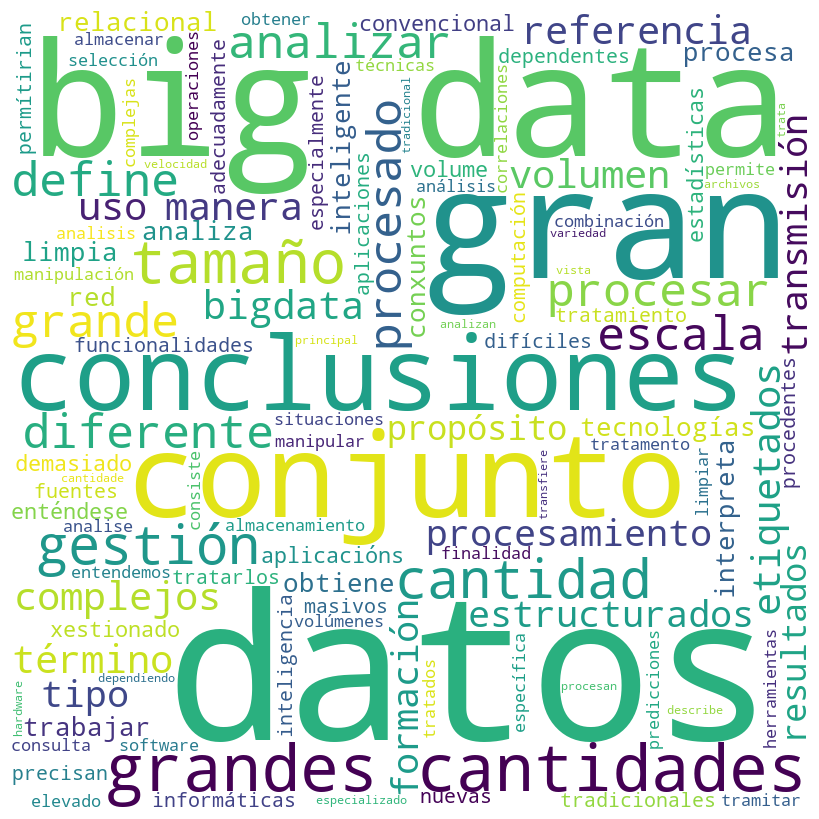

In [50]:
texto=parsear_txt()
texto=limparcodigo(texto)
print(texto)
generarNube(texto)


## Ampliación 1

Colle unha noticia recente e LONGA dun periódico. Indica a URL. Cambia o código para coller directamente do medio o texto (pista urllib3 e no codigo de ampliación). Podes ver un exemplo de descarga do contido dunha URL no notebook:"noticias-adicional.ipynb"

In [54]:
def def_urls(urlprop):
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"
    h = {"User-Agent": ua}
    resultados=''
    http = urllib3.PoolManager()
    medioDigital= urlprop
    r = http.request('GET', medioDigital, fields=None, headers=h)
    sopa = BeautifulSoup(r.data, "html.parser")
    web_solotexto = sopa.get_text()

    salida = ''

    for linea in web_solotexto.split('\n'):
        aux=linea.strip()
        if aux and len(aux) > 50:
            salida += aux + '\n'

    print (salida)

    #Otra forma, quizás más elegante:
    titulares = sopa.find_all('h4')

    for titular in titulares:
        resultados=titular.get_text().strip()
    return resultados + salida +''
        

In [55]:
url="https://www.xataka.com/energia/reactor-jet-ha-completado-exito-sus-pruebas-finales-deuterio-tritio-hito-crucial-para-fusion-nuclear"
url=def_urls(url)


El reactor JET ha completado con éxito sus pruebas finales con deuterio y tritio. Es un hito crucial para la fusión nuclear
El reactor JET ha completado con éxito sus pruebas finales con deuterio y tritio. Es un hito crucial para la fusión nuclear
Los técnicos de ITER iniciarán las pruebas de alta potencia con deuterio y tritio en 2035
Las pruebas con plasma ionizado llevadas a cabo en JET son cruciales para que ITER y DEMO salgan bien
Si todo sigue su curso como está previsto ITER (International Thermonuclear Experimental Reactor), el reactor experimental de fusión nuclear que está construyendo un consorcio internacional en la localidad francesa de Cadarache, iniciará las pruebas de alta potencia con deuterio y tritio en 2035. Estos dos isótopos del hidrógeno conforman el combustible que presumiblemente emplearán los reactores de energía de fusión comerciales cuando estén disponibles en la década de los años 60 de acuerdo con los planes de EUROfusion.
No obstante, antes de iniciar las

Limpamos o código e comprobamos que é correcto

In [56]:

url=limparcodigo(url)
print(url)

reactor jet completado éxito pruebas finales deuterio tritio hito crucial fusión nuclear reactor jet completado éxito pruebas finales deuterio tritio hito crucial fusión nuclear técnicos iter iniciarán pruebas alta potencia deuterio tritio 2035 pruebas plasma ionizado llevadas cabo jet cruciales iter demo salgan sigue curso previsto iter international thermonuclear experimental reactor reactor experimental fusión nuclear construyendo consorcio internacional localidad francesa cadarache iniciará pruebas alta potencia deuterio tritio 2035 isótopos hidrógeno conforman combustible presumiblemente emplearán reactores energía fusión comerciales disponibles década años acuerdo planes eurofusion obstante iniciar pruebas alta potencia combustible final iter deberá superar tests cruciales ejemplo pruebas baja alta potencia hidrógeno helio reactor experimental tener enorme importancia camino debemos recorrer posible llegada energía fusión comercial reactores cruciales cruciales curiosamente iter 

Generamos a nova nube de respostas

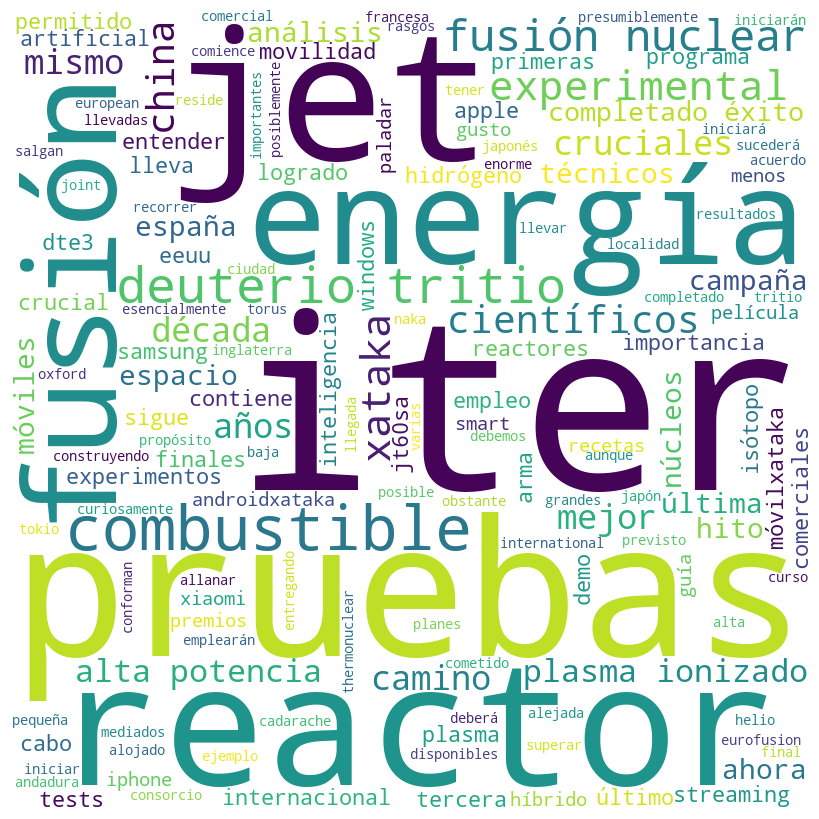

In [58]:
generarNube(url)

## Ampliación 2

Colle dos notebooks: "noticias-adicional.ipynb" e "nube_de_respostas.ipynb" o código para facer automáticamente unha nube de palabras dos titulares de VARIOS medios de comunicación.

Debes conseguir o mesmo que no anterior: Unha nube de palabras, pero desta vez, dos titulares de varios medios. Pista: Empregar funcións é unha boa idea.

Muere la mujer estrangulada el sábado por su pareja en Vallecas Ala Octa, el colirio que ha causado ceguera irreversible en centenares de pacientes La Autoridad Palestina da las gracias a Sánchez por sus palabras en contra de Israel: "España habló en voz alta" Yafa, Channa, Ruth... las vidas detrás de las ancianas y las niñas liberadas por Hamás Maya Regev, primera rehén del festival Nova que ha sido liberada por Hamás OPINION | "Sánchez coloca a España, e incluso a Europa, en una crisis diplomática grave" Weber critica el pacto del PSOE con Junts: "¡Pero qué locura es esta! El Gobierno español en manos de una instancia en Ginebra..." Sánchez elige a Espadas como nuevo portavoz en el Senado y ratifica a Patxi López en el Congreso Gobierno y Junta ofrecen 100.000 euros por hectárea a los agricultores de Doñana por abandonar sus cultivos El gesto con la mano de una rehén a un miliciano de Hamás en el momento de ser liberada Detenido un hombre de 26 años por el presunto asesinato de su ex

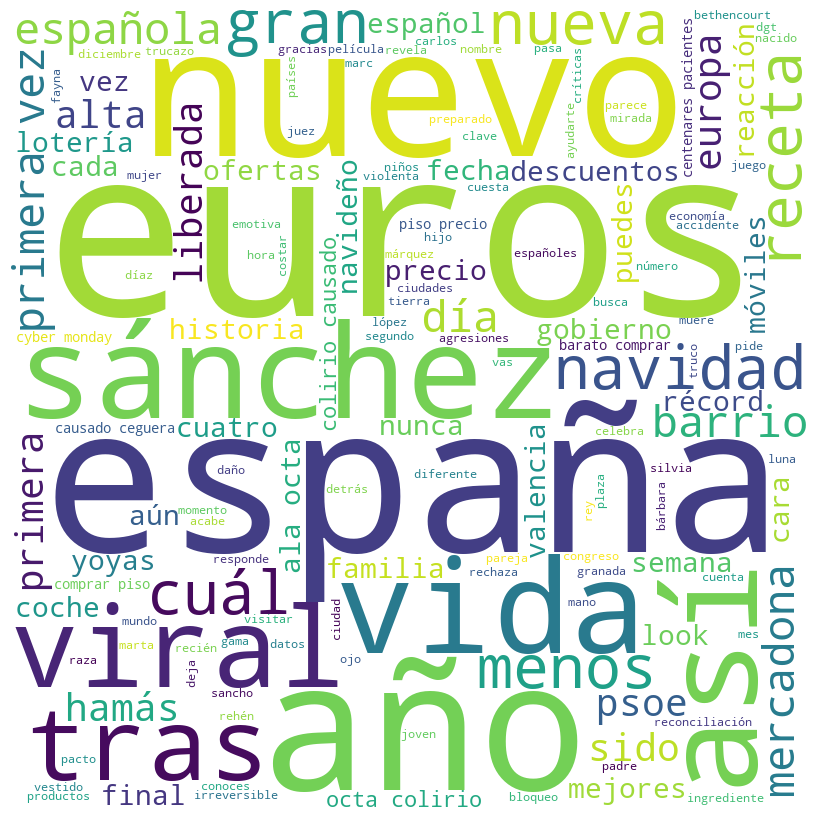

In [76]:
from bs4 import BeautifulSoup
import urllib3
import json

text = ''

ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"
headers = {"User-Agent": ua}

with open("json.json", "r") as f:
    json_data = json.load(f)

urls = json_data["lista"]
for url_info in urls:
    url = url_info["link"]
    http = urllib3.PoolManager()
    request = http.request('GET', url, fields=None, headers=headers)
    soup = BeautifulSoup(request.data, 'html.parser')
    text += " ".join([tag.text for tag in soup.find_all(['h1', 'h2'])])

# Mostrar el texto obtenido
text=limparcodigo(text)
generarNube(text)

##### David Fernández Reboredo 